<a href="https://colab.research.google.com/github/coco-in-bluemoon/three-minute-deep-learning-keras/blob/main/notebook/chapter6_1_ae_fc_mnist_mc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**완전 연결 계층 AE 모델링**

In [1]:
from keras import layers, models

In [2]:
class AE(models.Model):
    def __init__(self, x_nodes=784, z_dim=32):
        x_shape = (x_nodes,)
        x = layers.Input(shape=x_shape)
        z = layers.Dense(z_dim, activation='relu')(x)
        y = layers.Dense(x_nodes, activation='sigmoid')(z)

        super().__init__(x, y)

        self.x = x
        self.z = z
        self.z_dim = z_dim

        # adadelta is bad
        # self.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
        self.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


    def Encoder(self):
        return models.Model(self.x, self.z)

    def Decoder(self):
        z_shape = (self.z_dim,)
        z = layers.Input(shape=z_shape)
        y_layer = self.layers[-1]
        y = y_layer(z)
        return models.Model(z, y)

In [3]:
from keras.datasets import mnist
import numpy as np

In [4]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [5]:
import matplotlib.pyplot as plt

In [6]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc=0)


def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc=0)

def show_ae(autoencoder):
    encoder = autoencoder.Encoder()
    decoder = autoencoder.Decoder()

    encoded_imgs = encoder.predict(X_test)
    decoded_imgs = decoder.predict(encoded_imgs)

    n = 10
    plt.figure(figsize=(20, 6))
    for i in range(n):

        ax = plt.subplot(3, n, i + 1)
        plt.imshow(X_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n)
        plt.stem(encoded_imgs[i].reshape(-1))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [7]:
def main():
    x_nodes = 784
    z_dim = 32

    autoencoder = AE(x_nodes, z_dim)

    history = autoencoder.fit(X_train, X_train,
                              epochs=50,
                              batch_size=256,
                              shuffle=True,
                              validation_data=(X_test, X_test))

    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()

    show_ae(autoencoder)
    plt.show()


Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2781 - accuracy: 0.0143 - val_loss: 0.1911 - val_accuracy: 0.0141
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1719 - accuracy: 0.0118 - val_loss: 0.1544 - val_accuracy: 0.0124
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1453 - accuracy: 0.0100 - val_loss: 0.1347 - val_accuracy: 0.0095
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1299 - accuracy: 0.0094 - val_loss: 0.1227 - val_accuracy: 0.0096
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1197 - accuracy: 0.0100 - val_loss: 0.1143 - val_accuracy: 0.0094
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1126 - accuracy: 0.0101 - val_loss: 0.1084 - val_accuracy: 0.0110
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1074 - accuracy: 0.0101 - val_loss: 0.1038 - val_accuracy: 0.0109
Epoch 

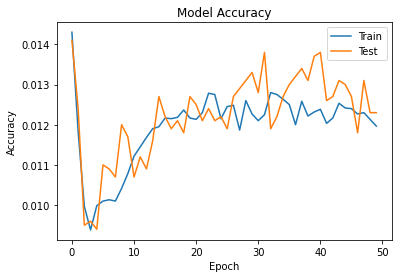

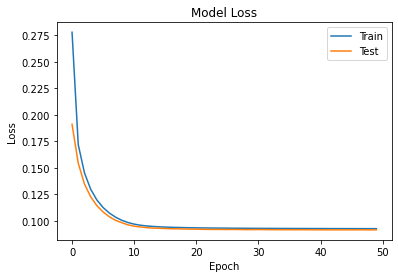

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

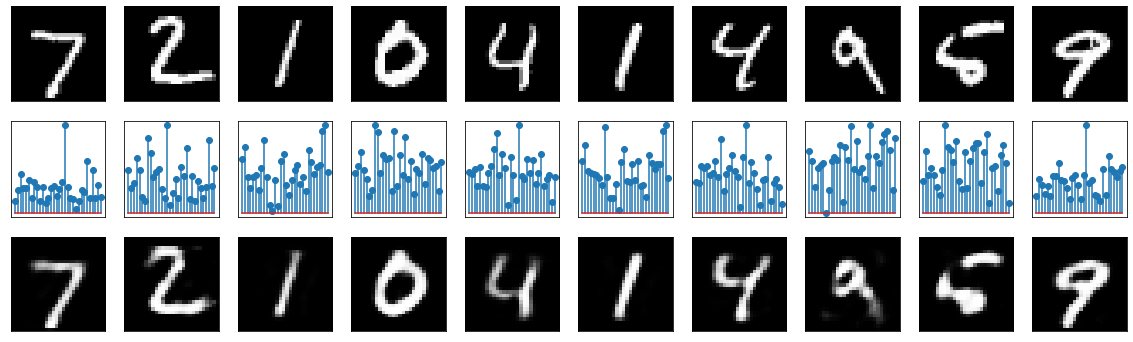

In [8]:
main()